In [6]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [7]:
data = pd.read_csv('VIC.csv')

In [8]:
data

,Open,High,Low,Close,Volume,Ticker,Change,upper_band,lower_band
0,24724,25102,24562,24724,557500,VIC,0.000000,0.000000,0.000000
1,24616,25048,24616,25048,1079780,VIC,0.013105,0.000000,0.000000
2,25102,25317,25102,25102,1123530,VIC,0.002156,0.000000,0.000000
3,25102,25263,25048,25102,575310,VIC,0.000000,0.000000,0.000000
4,25102,25102,24508,24508,560370,VIC,-0.023663,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
2047,46200,46750,46000,46350,1357800,VIC,0.006515,48369.743666,40860.256334
2048,46600,47150,46200,46750,2782500,VIC,0.008630,47999.783855,41060.216145
2049,46750,46900,46250,46850,2168200,VIC,0.002139,47971.481734,41073.518266
2050,47000,47550,46350,46700,3224900,VIC,-0.003202,48021.445321,41053.554679


In [17]:
df_log = np.log(data.Close)
train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-9504.385, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-9503.812, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-9506.311, Time=0.47 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-9506.204, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-9504.954, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-9504.478, Time=0.44 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-9502.502, Time=0.91 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-9507.537, Time=0.08 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-9505.721, Time=0.14 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-9505.622, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-9507.424, Time=0.12 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-9503.745, Time=0.42 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 3.480 seconds


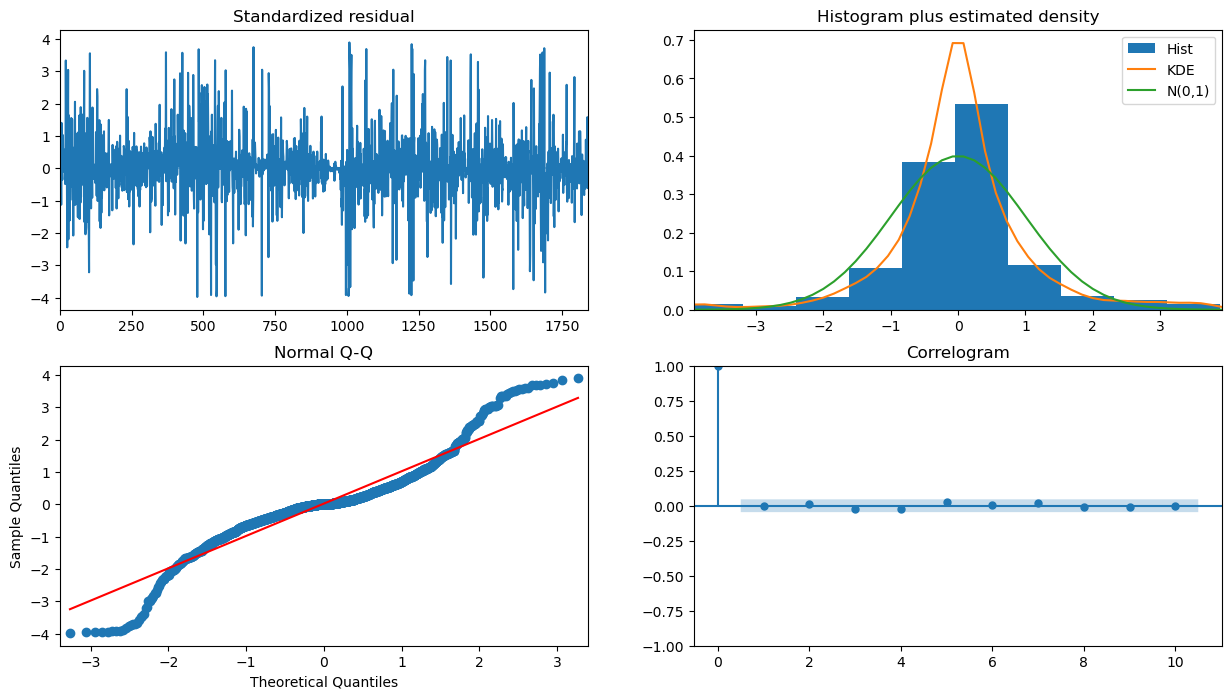

In [24]:

from statsmodels.tsa.arima_model import ARIMA

import pmdarima as pm

df_log = np.log(data.Close)
train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]

model = pm.auto_arima(train_data, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
model.plot_diagnostics(figsize=(15,8))
plt.show()

In [20]:
# import statsmodels.api as sm
# model = sm.tsa.arima.ARIMA(train_data, order=(1,1,2))  
# fitted = model.fit()  
# print(fitted.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1843
Model:                 ARIMA(1, 1, 2)   Log Likelihood              -15957.576
Date:                Wed, 22 May 2024   AIC                          31923.152
Time:                        04:24:52   BIC                          31945.227
Sample:                             0   HQIC                         31931.291
                               - 1843                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2794      0.507     -0.551      0.582      -1.274       0.715
ma.L1          0.3173      0.508      0.625      0.532      -0.678       1.313
ma.L2          0.0390      0.022      1.788      0.0

In [27]:
prediction, confint = model.predict(n_periods=120, return_conf_int=True)


In [28]:
prediction

1846    10.858903
1847    10.858898
1848    10.858898
1849    10.858898
1850    10.858898
          ...    
1961    10.858898
1962    10.858898
1963    10.858898
1964    10.858898
1965    10.858898
Length: 120, dtype: float64